In [3]:
#%pip install -U transformers
#%pip install -U accelerate
#%pip install -U datasets
#%pip install -U bertviz
#%pip install -U umap-learn
#%pip install seaborn --upgrade
#%pip install matplotlib


In [4]:
'''
Importing Data
'''

import pandas as pd

# Load two tier multi-class sentiment dataset
df = pd.read_csv("https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/twitter_multi_class_sentiment.csv")

In [5]:
df

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger
...,...,...,...
15995,i just had a very brief time in the beanbag an...,0,sadness
15996,i am now turning and i feel pathetic that i am...,0,sadness
15997,i feel strong and good overall,1,joy
15998,i feel like this was such a rude comment and i...,3,anger


In [6]:
df.info()
df.isnull().sum() # check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        16000 non-null  object
 1   label       16000 non-null  int64 
 2   label_name  16000 non-null  object
dtypes: int64(1), object(2)
memory usage: 375.1+ KB


text          0
label         0
label_name    0
dtype: int64

In [7]:
df.describe() # check for distribution of data (if there is any integer data types or float data types)

,label
count,16000.000000
mean,1.565937
std,1.501430
min,0.000000
25%,0.000000
50%,1.000000
75%,3.000000
max,5.000000


In [8]:
df['label'].value_counts() # check for class distribution (number of lables / classifications) we see there are 6 labels and the number of occurrences per label

label
1    5362
0    4666
3    2159
4    1937
2    1304
5     572
Name: count, dtype: int64

In [9]:
'''
Dataset Analysis
'''

import matplotlib.pyplot as plt

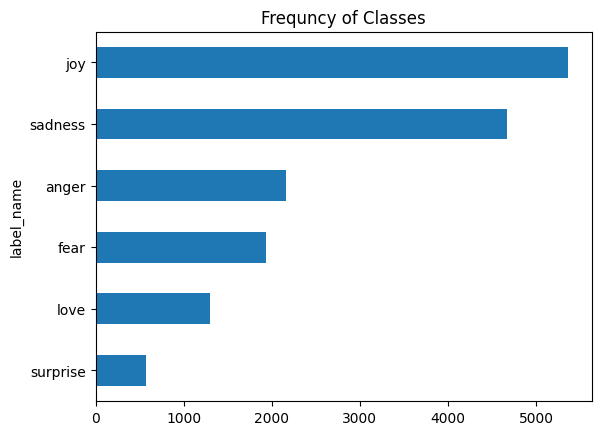

In [10]:
label_counts = df['label_name'].value_counts(ascending=True) # count the number of occurrences per label and get the names of each label as well
label_counts.plot.barh() # plot the number of occurrences per label
plt.title("Frequncy of Classes") # set the title of the plot
plt.show() # show the plot

# Since there is less surprise class occurrences, our model might be confused for tweets revolve around surprises.

<Axes: title={'center': 'Words per Tweet'}, xlabel='label_name'>

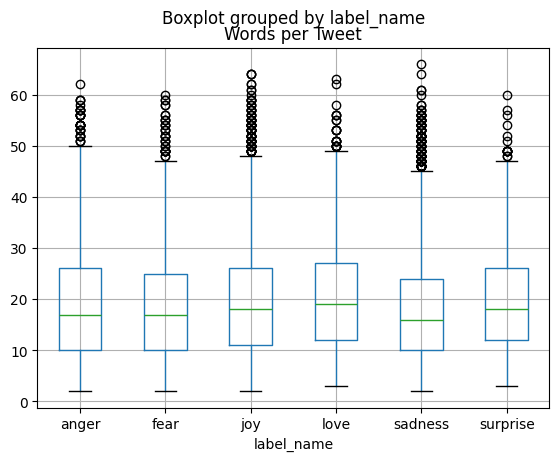

In [11]:
df['Words per Tweet'] = df['text'].str.split().apply(len) # count the number of words per tweet
df.boxplot("Words per Tweet", by="label_name") # plot the number of words per tweet per label

In [12]:
'''
Tokenization
'''

#Any transformer model cannot receive raw string data as the input. Instead they assume these text data is tokenized and it is encoded as numerical vectors.

from transformers import AutoTokenizer # import the AutoTokenizer class from the transformers library. The auto tokenizer automatically fetches the correct toekinzation based on the model checkpoint.

model_ckpt = "bert-base-uncased" # define the model checkpoint the uncased means that this model ignores the case of the text data

tokenizer = AutoTokenizer.from_pretrained(model_ckpt) # initialize the tokenizer with the model checkpoint

text = "I love machine learning! Tokenization is awesome!!" # define a sample text data to test the tokenizer
encoded_text = tokenizer(text) # encode the text data using the tokenizer
print(encoded_text)


e:\Tech Job Notes\AI Software Developer\AI\Fine-tuning LLMs\Projects\BERT Multi-Class Sentiment Classification Fine-Tuning\twitter\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{'input_ids': [101, 1045, 2293, 3698, 4083, 999, 19204, 3989, 2003, 12476, 999, 999, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [13]:
tokenizer.vocab # check the vocabulary of the tokenizer

{'##tai': 15444,
 'junctions': 27169,
 '##sant': 22341,
 '1705': 29326,
 '[unused369]': 374,
 '1735': 26063,
 'accountability': 17842,
 'dripping': 14309,
 '##lini': 22153,
 '史': 1790,
 '瀬': 1905,
 '4': 1018,
 'ג': 1243,
 'alfonso': 13591,
 'pawn': 19175,
 'sicily': 12071,
 'goes': 3632,
 'bordeaux': 16384,
 'uncles': 27328,
 'covent': 29456,
 'undermine': 25174,
 'ringo': 25589,
 '##gt': 13512,
 '[unused630]': 635,
 'cheney': 23745,
 '##tracted': 24301,
 'gujarati': 26428,
 'broadcasters': 18706,
 'burnt': 11060,
 'applicants': 17362,
 'transforms': 21743,
 'cartridge': 15110,
 'brother': 2567,
 'polls': 14592,
 '##ং': 29882,
 'feathers': 12261,
 '##=': 29630,
 'netting': 26909,
 '##nes': 5267,
 'offended': 15807,
 'whitley': 27007,
 'regulating': 21575,
 '##₍': 30087,
 'bragg': 23678,
 '##ero': 10624,
 '##ظ': 29829,
 'relevant': 7882,
 'prospective': 17464,
 'gel': 21500,
 '##90': 21057,
 'reins': 19222,
 'vested': 26003,
 'ljubljana': 21588,
 'differ': 11234,
 'membrane': 10804,
 'p

In [14]:
len(tokenizer.vocab) # check the length of the vocabulary (total number of tokens in the BERT model that you are using)

30522

In [15]:
tokenizer.vocab_size # check the size of the vocabulary (total number of tokens in the BERT model that you are using)

30522

In [16]:
tokenizer.model_max_length # check the maximum length of the model (maximum number of tokens that the model can accept)

512

In [17]:
'''
Data Loader and Train Test Split
'''

# We already have the data in the data frame (df), but transformers do not work directly from the data frame. We have to load this data frame as the dataset and data set dictionary so that it can be compatible.

from sklearn.model_selection import train_test_split # import the train_test_split function from the sklearn library

train, test = train_test_split(df, test_size=0.3, stratify=df['label_name']) # split the data into training and testing data with 70% of the data for training and 30% of the data for testing and stratify the data based on the label_name column

# Stratifying data means dividing the data into smaller parts or strata. These strata are based on predetermined criteria. This helps to divide the data into smaller sections of information that are easily comprehensible.
# In machine learning, stratified sampling is valuable because it reduces variance and sampling error, leading to more accurate estimates.

test, validation = train_test_split(test, test_size=1/3, stratify=test['label_name']) # split the testing data into testing and validation data with 1/3 of the data for testing and 2/3 of the data for validation and stratify the data based on the label_name column

train.shape, test.shape, validation.shape

((11200, 4), (3200, 4), (1600, 4))

In [18]:
from datasets import Dataset, DatasetDict # import the Dataset and DatasetDict classes from the datasets library

# Start building your dataset
dataset = DatasetDict(
    {'train':Dataset.from_pandas(train, preserve_index=False),
     'test':Dataset.from_pandas(test, preserve_index=False),
     'validation':Dataset.from_pandas(validation, preserve_index=False)
     }
) # create a dataset dictionary with the training, testing, and validation data

# Setting preserve_index to False means that the index of the data frame will not be preserved in the dataset. This is useful because the index of pandas DataFrame is often not meaningful for machine learning tasks.

dataset # shows features (columns) and number of rows
# use dataset['train or test or validation'] to access the data of the respective dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_name', 'Words per Tweet'],
        num_rows: 11200
    })
    test: Dataset({
        features: ['text', 'label', 'label_name', 'Words per Tweet'],
        num_rows: 3200
    })
    validation: Dataset({
        features: ['text', 'label', 'label_name', 'Words per Tweet'],
        num_rows: 1600
    })
})

In [19]:
'''
Tokenization of the Emotion/Sentiment Data
'''
dataset['train'][0] # check the first row of the training data


{'text': 'i wonder how it feels to have angered and disappointed millions of people in one morning',
 'label': 3,
 'label_name': 'anger',
 'Words per Tweet': 16}

In [20]:
def tokenize(batch):
    temp = tokenizer(batch['text'], padding=True, truncation=True, max_length=512) # tokenize the text data with padding, truncation, and a maximum length of 512 tokens
    # Padding is a technique used in natural language processing to ensure that all input sequences have the same length. This is important because many marchine learning models, including BERT, require inputs of a fixed size.
    # Truncation is a technique used in natural language processing to ensure thatinput sentences do not exceed a specified maximum length.
    # when tokenizaing text data, sequences can vary in length, and some sequences may be longer than the model's maximum input size. Truncation cuts off excess tokens
    # from the end of the sequence to fit within the specified maximum length.
    return temp

print(tokenize(dataset['train'][:2])) # check the tokenized data for the first two rows of the training data


{'input_ids': [[101, 1045, 4687, 2129, 2009, 5683, 2000, 2031, 18748, 1998, 9364, 8817, 1997, 2111, 1999, 2028, 2851, 102], [101, 1045, 7078, 2293, 2023, 15629, 11917, 2009, 2003, 2725, 16278, 2005, 2033, 1998, 1045, 2514, 18783, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [21]:
emotion_encoded = dataset.map(tokenize, batched=True, batch_size=None) # map the tokenization function to the dataset
# When batched is True the data is processed in batches. This is useful when the data is large and cannot fit into memory.
# When batch_size is None, the function will be applied to all the data at once. This is useful when the data is small and can fit into memory.

Map: 100%|██████████| 1600/1600 [00:00<00:00, 25098.87 examples/s]


In [22]:
emotion_encoded # shows the tokenized data

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_name', 'Words per Tweet', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 11200
    })
    test: Dataset({
        features: ['text', 'label', 'label_name', 'Words per Tweet', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 3200
    })
    validation: Dataset({
        features: ['text', 'label', 'label_name', 'Words per Tweet', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1600
    })
})

In [23]:
# We need to find out two important variables: label2id and id2label. We have to create a mapping between the label name and the label id. This is because the model cannot understand the label names directly. It can only understand the label ids.
label2id = { x['label_name']:x['label'] for x in dataset['train']} # create a new dictionary mapping between the label name and the label id for the training data
id2label= {v:k for k,v in label2id.items()} # create a new dictionary mapping between the label id and the label name for the training data

label2id, id2label

({'anger': 3, 'joy': 1, 'sadness': 0, 'surprise': 5, 'love': 2, 'fear': 4},
 {3: 'anger', 1: 'joy', 0: 'sadness', 5: 'surprise', 2: 'love', 4: 'fear'})

In [24]:
'''
Model Building
'''

# -------------------- Showing model configuration, this part is only for showing model.config and not for training the model --------------------
from transformers import AutoModel # import the AutoModel class from the transformers library
import torch # import the torch library


In [25]:
model = AutoModel.from_pretrained(model_ckpt) # initialize the model with the model checkpoint, the model will download and load the bert_based_uncased model checkpoint


In [26]:
model # shows the model architecture

# use model.config to get the model configuration like the number of layers, hidden size, number of attention heads, etc.

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [27]:
# Actual model loading for training

from transformers import AutoModelForSequenceClassification, AutoConfig # import the AutoModelForSequenceClassification and AutoConfig classes from the transformers library

# AutoModelForSequenceClassification is a class that is used to load a pre-trained model that is fine-tuned for sequence classification tasks. It has a classification head on top of the pretrained model outputs, which can be easily trained with the base model.T_destination
# This is why we are not using AutoModel class for training, because we need to train the model for sequence classification tasks and AutoModelForSequenceClassification already has a classification head on top of the pretrained model outputs.

num_labels = len(label2id) # get the number of labels from the label2id dictionary
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # check if a GPU is available and set the device accordingly

config = AutoConfig.from_pretrained(model_ckpt, label2id=label2id, id2label=id2label) # initialize the model configuration with the model checkpoint, label2id, and id2label

# We need label2id and id2label because they are configurations in the model itself. You don't need to store label2id and id2lable in prediction so it will automatically convert your prediction into a readable label format instead of printing some prediction IDs there.
# We initialize label2id and id2label so when we use our model in production we dont need to maintain label2id and id2label. We can directly use the model to predict the labels.

model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, config=config).to(device) # initialize the model for sequence classification with the model checkpoint, configuration, and device


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [28]:
model.config # shows the model configuration

BertConfig {
  "_attn_implementation_autoset": true,
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "sadness",
    "1": "joy",
    "2": "love",
    "3": "anger",
    "4": "fear",
    "5": "surprise"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "anger": 3,
    "fear": 4,
    "joy": 1,
    "love": 2,
    "sadness": 0,
    "surprise": 5
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "torch_dtype": "float32",
  "transformers_version": "4.49.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

In [29]:
from transformers import TrainingArguments # import the TrainingArguments class from the transformers library to build training arguments

batch_size = 64
training_dir = "bert_base_train_dir" # define the directory to save the training data

# Build training arguments
training_args = TrainingArguments( output_dir=training_dir, # define the output directory to save the training data
                                  overwrite_output_dir=True, # overwrite the output directory if it already exists
                                  num_train_epochs=2, # define the number of training epochs
                                  learning_rate=2e-5, # define the learning rate
                                  per_device_train_batch_size=batch_size, # define the training batch size per device
                                  per_device_eval_batch_size=batch_size, # define the evaluation batch size per device
                                  weight_decay=0.01, # define the weight decay
                                  evaluation_strategy='epoch', # define the evaluation strategy
                                  disable_tqdm=False # disable the tqdm progress bar
) 

# The epochs are the number of times the model will see the entire dataset.
# The learning rate is the rate at which the model will learn from the data. It is a hyperparameter that controls how much the model weights will be updated during training.
# The weight decay is the regularization parameter that prevents overfitting. It is used to penalize large weights in the model.
# The evaluation strategy is the strategy used to evaluate the model during training. The epoch strategy evaluates the model at the end of each epoch.
# The disable_tqdm is used to disable the tqdm progress bar. The tqdm progress bar is a progress bar that shows the progress of the training process.

# To evaluate your model, you need compute metrics. By default, HuggingFace does not have compute metrics in-built. You have to make your own compute metrics 
# so that you can identify how much accuracy your model is getting during training and evaluation phase.



e:\Tech Job Notes\AI Software Developer\AI\Fine-tuning LLMs\Projects\BERT Multi-Class Sentiment Classification Fine-Tuning\twitter\Lib\site-packages\transformers\training_args.py:1594: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [30]:
# Build compute matrics function
#%pip install evaluate

In [31]:
import evaluate
import numpy as np

accuracy = evaluate.load("accuracy") # load the accuracy metric


def compute_metrics_evaluate(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels) # compute the accuracy metric

# The compute_metrics function takes the eval_pred as input and returns the accuracy metric. The eval_pred is a tuple of predictions and labels.
# The predictions are the predicted labels by the model and the labels are the actual labels. The predictions are converted to the argmax of the predictions.
# argmax is a function that returns the index of the maximum value in a list. The predictions are compared with the labels and the accuracy metric is computed.
# The accuracy metric is computed using the predictions and labels. The accuracy metric is the accuracy of the model on the dataset.



In [32]:
'''
Alternative way to build compute metrics
Use sklearn to build compute metrics

Code:
from sklearn.metrics import accuracy_score, f1_score
def compute_metrics(pred):
    labels = pred.label_ids # get the label ids from the predictions
    preds = pred.predictions.argmax(-1) # get the predicted labels from the predictions

    f1 = f1_score(labels, preds, average='weighted') # compute the f1 score
    acc = accuracy_score(labels, preds) # compute the accuracy score

    return{"accuracy": acc, "f1": f1} # return the accuracy and f1 score
'''



# The compute_metrics function takes the pred as input and returns the accuracy and f1 score.
# The labels are extracted from the predictions and the predicted labels are extracted from the predictions.
# The f1 score is computed using the labels and predicted labels. The f1 score is the harmonic mean of precision and recall.
# The accuracy score is computed using the labels and predicted labels. The accuracy score is the proportion of correct predictions.
# The accuracy and f1 score are returned as a dictionary.


'\nAlternative way to build compute metrics\nUse sklearn to build compute metrics\n\nCode:\nfrom sklearn.metrics import accuracy_score, f1_score\ndef compute_metrics(pred):\n    labels = pred.label_ids # get the label ids from the predictions\n    preds = pred.predictions.argmax(-1) # get the predicted labels from the predictions\n\n    f1 = f1_score(labels, preds, average=\'weighted\') # compute the f1 score\n    acc = accuracy_score(labels, preds) # compute the accuracy score\n\n    return{"accuracy": acc, "f1": f1} # return the accuracy and f1 score\n'

In [33]:
'''
Build Trainer
'''

from transformers import Trainer

trainer = Trainer(model=model, # initialize the trainer with the model 
                  args=training_args, # initialize the trainer with the model and training arguments
                  compute_metrics=compute_metrics_evaluate, # set the compute metrics function
                  train_dataset = emotion_encoded['train'], # set the training dataset
                  eval_dataset = emotion_encoded['validation'], # set the evaluation dataset
                  tokenizer = tokenizer # set the tokenizer
)

# The Trainer class is used to train the model. It takes the model, training arguments, compute metrics function, training dataset, evaluation dataset, and tokenizer as input.
# The model is the model that will be trained. The training arguments are the arguments that will be used to train the model.



C:\Users\dlz98\AppData\Local\Temp\ipykernel_23088\4077551329.py:7: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model, # initialize the trainer with the model


In [34]:
trainer.train() # train the model

Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.486301,0.846250
2,No log,0.304681,0.903750


TrainOutput(global_step=350, training_loss=0.7092281232561384, metrics={'train_runtime': 1635.8365, 'train_samples_per_second': 13.693, 'train_steps_per_second': 0.214, 'total_flos': 1001502421516800.0, 'train_loss': 0.7092281232561384, 'epoch': 2.0})

In [35]:
'''
Model Evaluation
'''

preds_output = trainer.predict(emotion_encoded['test']) # predict the test data

preds_output.metrics # show the metrics of the predictions

{'test_loss': 0.31556519865989685,
 'test_accuracy': 0.8946875,
 'test_runtime': 52.3601,
 'test_samples_per_second': 61.115,
 'test_steps_per_second': 0.955}

In [36]:
preds_output.predictions # show the classification report and the confusion matrix of the predictions


array([[-1.247014  ,  3.532147  ,  1.0630271 , -1.8816962 , -1.380889  ,
        -0.72718287],
       [-1.4208158 ,  4.236264  ,  0.21777798, -1.5523657 , -1.4056733 ,
        -0.7693796 ],
       [-0.48766512, -1.0012057 , -0.40010497,  4.027784  , -0.18462375,
        -0.77079743],
       ...,
       [-0.6166707 ,  4.102846  , -0.4751004 , -1.2116065 , -1.4987137 ,
        -1.2029569 ],
       [ 4.1403446 , -0.5956324 , -0.9939605 , -0.95505965, -0.58276856,
        -1.1838024 ],
       [ 3.8059387 , -0.08920795, -0.8261997 ,  0.31259874, -1.4365591 ,
        -1.5308485 ]], dtype=float32)

In [37]:

#The predictions are given as logits. Logits are the raw output of the model before the softmax function is applied. The softmax function is used to convert the logits into probabilities.

#But we do not need probability, we just need to determine which index has the highest logits value. Highest logits value means the model is most confident about that class.

y_pred = np.argmax(preds_output.predictions, axis=1) # get the predicted labels from the predictions using the argmax function
y_true = emotion_encoded['test'][:]['label'] # get the actual labels from the test data using the label column

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred)) # print the classification report of the actual and predicted labels, the leftmost column is the label id

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       933
           1       0.91      0.91      0.91      1072
           2       0.77      0.73      0.75       261
           3       0.90      0.89      0.89       432
           4       0.84      0.90      0.87       387
           5       0.92      0.70      0.79       115

    accuracy                           0.89      3200
   macro avg       0.88      0.85      0.86      3200
weighted avg       0.89      0.89      0.89      3200



In [38]:
label2id # shows the label2id dictionary to check the label names and their corresponding label ids

# Seems like our model is suffering on predicting love and surprise classes. We can try to improve the model by increasing the number of epochs, changing the learning rate, or changing the model checkpoint.
# Another fix is to increase the number of samples for the love and surprise classes. This can be done by data augmentation techniques like back translation, synonym replacement, etc. This is quite costly though because annotations of the data will have to be manual.
# An alternative to increasing the number of samples is to try to balance your overall data set just to see if your accuracy is getting increased.

{'anger': 3, 'joy': 1, 'sadness': 0, 'surprise': 5, 'love': 2, 'fear': 4}

In [39]:
# plot confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
cm = confusion_matrix(y_true, y_pred) # compute the confusion matrix of the actual and predicted labels
cm

array([[886,  15,   3,  13,  15,   1],
       [ 29, 972,  52,  11,   8,   0],
       [  7,  56, 190,   3,   4,   1],
       [ 25,   8,   2, 385,  12,   0],
       [ 10,   5,   0,  17, 350,   5],
       [  0,   8,   1,   0,  26,  80]])

Text(0.5, 25.722222222222214, 'Predicted')

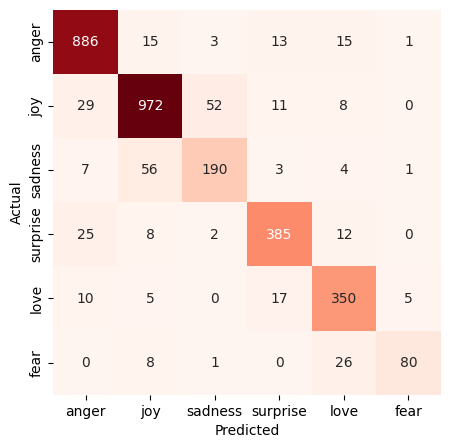

In [42]:
plt.figure(figsize=(5,5)) # set the figure size of the plot to 5x5. The figure size is the width and height of the plot
sns.heatmap(cm, annot=True, xticklabels=label2id.keys(), yticklabels=label2id.keys(), fmt='d', cbar=False, cmap='Reds') # plot the confusion matrix with annotations, xticklabels, yticklabels, format, color bar, and color map
plt.ylabel('Actual') # set the y-axis label of the plot
plt.xlabel('Predicted') # set the x-axis label of the plot

In [ ]:
'''
Build Prediction Function and Store Model
'''

text = "I am super happy today. I got it done. Finally!!" # define a sample text data to test the model

#raw method, more control on how to do the calculation
def get_prediction(text):
    input_encoded = tokenizer(text, return_tensors='pt').to(device) # encode the text data using the tokenizer and move the data to the device (GPU or CPU)
    # return_tensors='pt' returns the encoded data as PyTorch tensors

    with torch.no_grad(): # turn off the gradient calculation, this is because we are not training the model
        outputs = model(**input_encoded) # pass the encoded data to the model

    logits = outputs.logits

    pred = torch.argmax(logits, dim=1).item() # get the predicted label from the logits using the argmax function
    return id2label[pred]

get_prediction(text) # get the prediction of the sample text data

'joy'

In [53]:
# Store your model

trainer.save_model("bert-based-uncased-sentiment-model") # save the model to the specified directory

In [ ]:
# User pipeline for prediction

# Simple and straightforward
# Has low # of lines of code
from transformers import pipeline

classifier = pipeline('text-classification', model='bert-based-uncased-sentiment-model') # initialize the pipeline with the model checkpoint and the model directory

classifier([text, 'hello, how are you?', 'love you', 'I am feeling low']) # get the prediction of the sample text data using the pipeline, you can also pass in a list for multiple text inputs for the model to classify


Device set to use cpu


[{'label': 'joy', 'score': 0.9744991064071655},
 {'label': 'joy', 'score': 0.8042474985122681},
 {'label': 'love', 'score': 0.41770052909851074},
 {'label': 'sadness', 'score': 0.9648241996765137}]